# Boston Housing Model

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn
import tqdm
%matplotlib inline

from sklearn.svm import SVR
from time import time
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

## Model

In [2]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(404, 104) (102, 104) (404,) (102,)


In [4]:
def model_evaluation_lr(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mape = round(mean_absolute_percentage_error(y_test, y_pred), 3)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)
    r2 = round(r2_score(y_test, y_pred), 3)
    return {'mape': mape, 'rmse': rmse, 'r2': r2}

In [5]:
# Define a list of dictionaries for different SVR models
svr_models = [
    {
        'name': 'SVR Polynomial',
        'model': SVR(kernel='poly'),
        'scalers': {'scaler': [None, MinMaxScaler()]},
        'params': {
            'C': [0.1, 1, 10, 100, 1000],
            'gamma': [0.001, 0.01, 0.1, 1, 10],
            'epsilon': [0.01, 0.1, 1],
        }
    },
    {
        'name': 'SVR Linear',
        'model': SVR(kernel='linear'),
        'scalers': {'scaler': [None, MinMaxScaler()]},
        'params': {
            'C': [0.1, 1, 10, 100, 1000],
            'gamma': [0.001, 0.01, 0.1, 1, 10],
            'epsilon': [0.01, 0.1, 1],
        }
    },
    {
        'name': 'SVR RBF',
        'model': SVR(kernel='rbf'),
        'scalers': {'scaler': [None, MinMaxScaler()]},
        'params': {
            'C': [0.1, 1, 10, 100, 1000],
            'gamma': [0.001, 0.01, 0.1, 1, 10],
            'epsilon': [0.01, 0.1, 1],
        }
    },
    {
        'name': 'SVR Sigmoid',
        'model': SVR(kernel='sigmoid'),
        'scalers': {'scaler': [None, MinMaxScaler()]},
        'params': {
            'C': [0.1, 1, 10, 100, 1000],
            'gamma': [0.001, 0.01, 0.1, 1, 10],
            'epsilon': [0.01, 0.1, 1],
        }
    },
]

results = pd.DataFrame(columns=["Model", "CPU time", "MAPE", "RMSE", "R2"])
models = {}
nb_res = 0

for model_info in tqdm(svr_models, desc="Training SVR Models"):
    model_name = model_info['name']
    model = model_info['model']
    param_grid = model_info['params']

    clf = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_percentage_error')

    start_time = time()
    clf.fit(X_train, Y_train)
    end_time = time()

    eval = model_evaluation_lr(clf, X_test, Y_test)
    models[model_name] = clf

    results.loc[nb_res] = [model_name, round(end_time - start_time, 1), eval['mape'], eval['rmse'], eval['r2']]
    nb_res += 1

print(results)


Training SVR Models:   0%|          | 0/4 [00:00<?, ?it/s]

Fitting 5 folds for each of 75 candidates, totalling 375 fits


Training SVR Models:  25%|██▌       | 1/4 [36:23<1:49:09, 2183.16s/it]

Fitting 5 folds for each of 75 candidates, totalling 375 fits


Training SVR Models:  50%|█████     | 2/4 [36:46<30:25, 912.70s/it]   

Fitting 5 folds for each of 75 candidates, totalling 375 fits


Training SVR Models:  75%|███████▌  | 3/4 [36:48<08:17, 497.03s/it]

Fitting 5 folds for each of 75 candidates, totalling 375 fits


Training SVR Models: 100%|██████████| 4/4 [36:50<00:00, 552.54s/it]

            Model  CPU time   MAPE   RMSE     R2
0  SVR Polynomial    2183.1  0.103  3.431  0.839
1      SVR Linear      23.3  0.106  3.663  0.817
2         SVR RBF       2.4  0.097  3.298  0.852
3     SVR Sigmoid       1.2  0.118  3.883  0.794


- MAPE (Error porcentual absoluto medio): El modelo SVR RBF tiene el menor MAPE (0.097), lo que indica que tiene el menor error medio absoluto como porcentaje del valor real.

- RMSE (Error cuadrático medio de la raíz): El modelo SVR RBF también tiene el valor más bajo de RMSE (3.298), lo que sugiere que tiene la menor diferencia entre los valores predichos y los valores reales.

- R2 (Coeficiente de determinación): El modelo SVR RBF tiene el valor más alto de R2 (0.852), lo que sugiere que explica mejor la variabilidad en los datos en comparación con los otros modelos.

- CPU time (Tiempo de CPU): Indica el tiempo de procesamiento requerido para entrenar cada modelo. Aquí, se observa que el modelo SVR Polynomial requirió el tiempo más largo (2183.1 segundos), seguido por el modelo SVR Linear (23.3 segundos), SVR RBF (2.4 segundos) y SVR Sigmoid (1.2 segundos).

En resumen, los resultados indican que el modelo SVR con kernel RBF tiene el mejor rendimiento en términos de MAPE, RMSE y R2, mientras que el modelo SVR Polynomial requirió el tiempo de entrenamiento más largo.

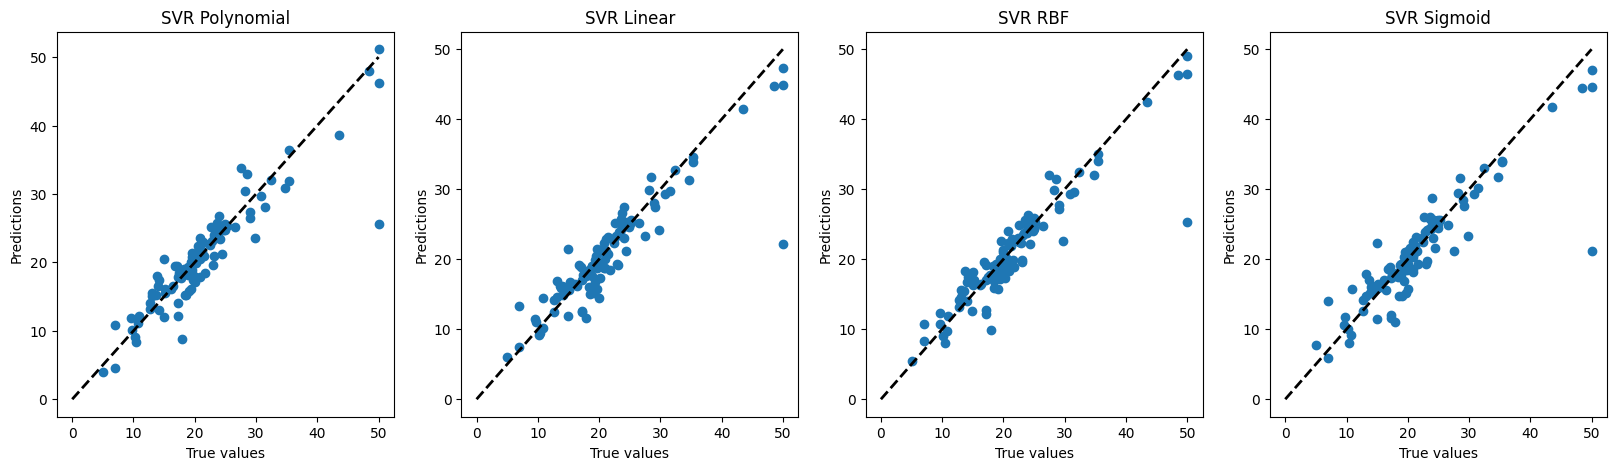

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, model_name in enumerate(models.keys()):
    model = models[model_name]
    y_pred = model.predict(X_test)

    axs[i].plot([0, Y_test.max()], [0, Y_test.max()], 'k--', lw=2)
    axs[i].scatter(Y_test, y_pred)
    axs[i].set_xlabel('True values')
    axs[i].set_ylabel('Predictions')
    axs[i].set_title(model_name)

plt.show()

**SVR polinomial**

El gráfico de SVR polinomial muestra que este modelo tiene un buen rendimiento cuando los datos son lineales o casi lineales. Sin embargo, cuando los datos son más complejos, el rendimiento del modelo puede disminuir. Esto se debe a que el modelo polinomial es susceptible al sobreajuste, lo que significa que puede aprender demasiados detalles de los datos de entrenamiento y no generalizarse bien a nuevos datos.

**SVR lineal**

El gráfico de SVR lineal muestra que este modelo tiene un buen rendimiento cuando los datos son lineales. Sin embargo, cuando los datos son más complejos, el rendimiento del modelo puede disminuir. Esto se debe a que el modelo lineal no puede capturar relaciones no lineales entre las variables.

**SVR RBF**

El gráfico de SVR RBF muestra que este modelo tiene un buen rendimiento en una amplia gama de conjuntos de datos. Esto se debe a que el modelo RBF puede capturar relaciones no lineales entre las variables. Sin embargo, el modelo RBF puede ser computacionalmente costoso de entrenar y puede ser susceptible al sobreajuste.

**SVR sigmoide**

El gráfico de SVR sigmoide muestra que este modelo tiene un buen rendimiento en una amplia gama de conjuntos de datos. Esto se debe a que el modelo sigmoide puede capturar relaciones no lineales entre las variables. Sin embargo, el modelo sigmoide puede ser computacionalmente costoso de entrenar y puede ser susceptible al sobreajuste.